<a href="https://colab.research.google.com/github/soujanyakd/sample-code/blob/main/UNSW_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive. mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import regularizers

from tensorflow.keras import layers
from tensorflow.keras import losses

from collections import Counter


import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer


import pydot

In [3]:
#uploading training dataset
data= pd.read_csv("/content/drive/MyDrive/UNSW_NB15_testing-set.csv")
print('-------Data--------')
print(data['attack_cat'].value_counts())
print(len(data))
print('-------------------------')
data

-------Data--------
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64
175341
-------------------------


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.980570,3721.068786,120.177727,255,3518776216,3453092386,255,0.099440,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,Generic,1


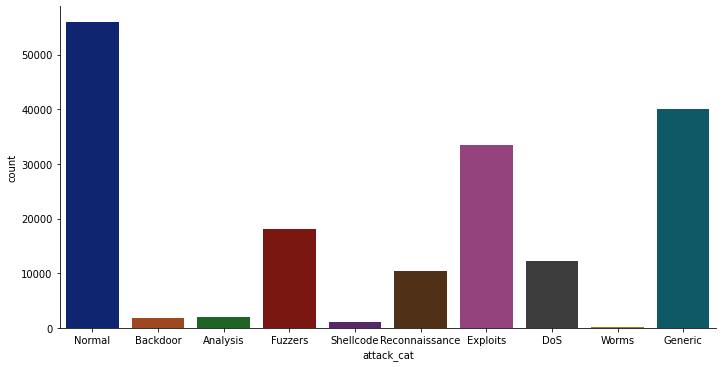

In [4]:
sns.catplot(x="attack_cat",kind="count", data=data, palette="dark",aspect=1.99)

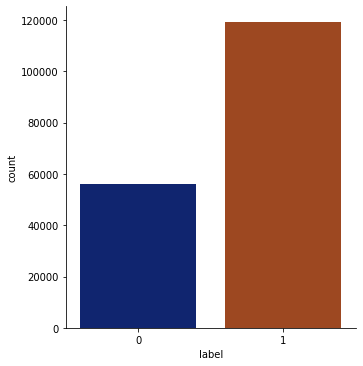

In [5]:
sns.catplot(x="label",kind="count", data=data, palette="dark",aspect=0.99)

In [6]:
data.drop(data[data['attack_cat']=='Generic'].index, inplace = True)
data.drop(data[data['attack_cat']=='Fuzzers'].index, inplace = True)
data.drop(data[data['attack_cat']=='DoS'].index, inplace = True)
data.drop(data[data['attack_cat']=='Backdoor'].index, inplace = True)
data.drop(data[data['attack_cat']=='Shellcode'].index, inplace = True)
data.drop(data[data['attack_cat']=='Worms'].index, inplace = True)
print(data['attack_cat'].value_counts())

Normal            56000
Exploits          33393
Reconnaissance    10491
Analysis           2000
Name: attack_cat, dtype: int64


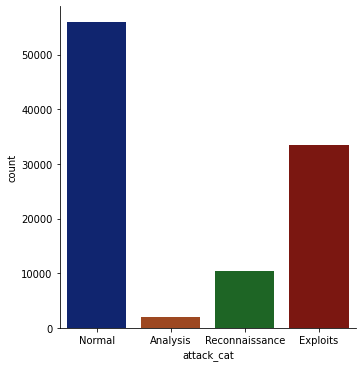

In [7]:
sns.catplot(x="attack_cat",kind="count", data=data, palette="dark",aspect=.99)

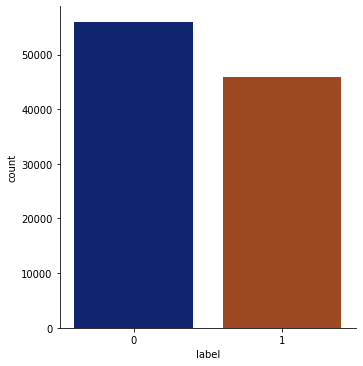

In [8]:
sns.catplot(x="label",kind="count", data=data, palette="dark",aspect=.99)

In [9]:
data.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [10]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101884 entries, 0 to 175305
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101884 non-null  int64  
 1   dur                101884 non-null  float64
 2   proto              101884 non-null  object 
 3   service            101884 non-null  object 
 4   state              101884 non-null  object 
 5   spkts              101884 non-null  int64  
 6   dpkts              101884 non-null  int64  
 7   sbytes             101884 non-null  int64  
 8   dbytes             101884 non-null  int64  
 9   rate               101884 non-null  float64
 10  sttl               101884 non-null  int64  
 11  dttl               101884 non-null  int64  
 12  sload              101884 non-null  float64
 13  dload              101884 non-null  float64
 14  sloss              101884 non-null  int64  
 15  dloss              101884 non-null  int64  
 16  si

In [11]:
print(data['service'].value_counts())
print(data['proto'].value_counts())
print(data['state'].value_counts())

-           63942
http        16186
dns          7713
smtp         4703
ftp-data     3987
ftp          2833
ssh          1301
pop3         1043
snmp           66
dhcp           52
ssl            39
irc            10
radius          9
Name: service, dtype: int64
tcp          64474
udp          18132
unas          6700
arp           2859
ospf          1551
             ...  
ipv6-opts       55
mux             55
igmp            18
icmp            15
rtp              1
Name: proto, Length: 133, dtype: int64
FIN    62425
INT    25253
CON    12749
REQ     1362
RST       80
ECO       12
PAR        1
URN        1
no         1
Name: state, dtype: int64


In [12]:

data=data.drop(['service'],axis=1)
data=data.drop(['id'],axis=1)

In [13]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['proto'] = le.fit_transform(data['proto'])
data['state'] = le.fit_transform(data['state'])
data.replace({'attack_cat':{'Normal':0,'Exploits':1,'Reconnaissance':2,'Analysis':3}},inplace=True)
print(data['attack_cat'].value_counts())

0    56000
1    33393
2    10491
3     2000
Name: attack_cat, dtype: int64


In [14]:
data = data.apply(pd.to_numeric)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101884 entries, 0 to 175305
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                101884 non-null  float64
 1   proto              101884 non-null  int64  
 2   state              101884 non-null  int64  
 3   spkts              101884 non-null  int64  
 4   dpkts              101884 non-null  int64  
 5   sbytes             101884 non-null  int64  
 6   dbytes             101884 non-null  int64  
 7   rate               101884 non-null  float64
 8   sttl               101884 non-null  int64  
 9   dttl               101884 non-null  int64  
 10  sload              101884 non-null  float64
 11  dload              101884 non-null  float64
 12  sloss              101884 non-null  int64  
 13  dloss              101884 non-null  int64  
 14  sinpkt             101884 non-null  float64
 15  dinpkt             101884 non-null  float64
 16  sj

In [16]:
data.round(decimals=2)
data = data.astype(int)
data

,dur,proto,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0,113,2,6,4,258,172,74,252,254,14158,8495,0,0,24,8,30,11,255,621772692,2202533631,255,0,0,0,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0,0
1,0,113,2,14,38,734,42014,78,62,252,8395,503571,2,17,49,15,61,1387,255,1417884146,3077387971,255,0,0,0,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,0,0
2,1,113,2,8,16,364,13186,14,62,252,1572,60929,1,6,231,102,17179,11420,255,2116150707,2963114973,255,0,0,0,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,0,0
3,1,113,2,12,12,628,770,13,62,252,2740,3358,1,3,152,90,259,4991,255,1107119177,1047442890,255,0,0,0,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,0,0
4,0,113,2,10,6,534,268,33,254,252,8561,3987,2,1,47,75,2415,115,255,2436137549,1977154190,255,0,0,0,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175214,0,113,2,22,56,2424,68382,77,62,252,18717,543250,6,26,47,17,2347,1589,255,3903615664,3345025299,255,0,0,0,110,1221,1,109,1,1,1,1,1,1,0,0,1,21,1,0,1,1
175267,1,113,2,74,30,69997,2132,53,62,252,288572,8613,33,8,26,65,2412,90,255,556303757,246088519,255,0,0,0,946,71,0,0,1,1,1,1,1,1,0,0,0,18,1,0,1,1
175277,3,113,2,66,340,3086,426483,108,62,252,6539,914689,6,167,57,10,3358,1585,255,3046870123,1723342386,255,0,0,0,47,1254,0,0,1,1,1,1,1,1,0,0,0,2,1,0,1,1
175299,0,113,2,20,30,942,16684,49,62,252,7185,129476,7,13,52,33,3005,2479,255,5604755,575257391,255,0,0,0,47,556,0,0,1,1,1,1,1,1,0,0,0,7,1,0,1,1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101884 entries, 0 to 175305
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   dur                101884 non-null  int64
 1   proto              101884 non-null  int64
 2   state              101884 non-null  int64
 3   spkts              101884 non-null  int64
 4   dpkts              101884 non-null  int64
 5   sbytes             101884 non-null  int64
 6   dbytes             101884 non-null  int64
 7   rate               101884 non-null  int64
 8   sttl               101884 non-null  int64
 9   dttl               101884 non-null  int64
 10  sload              101884 non-null  int64
 11  dload              101884 non-null  int64
 12  sloss              101884 non-null  int64
 13  dloss              101884 non-null  int64
 14  sinpkt             101884 non-null  int64
 15  dinpkt             101884 non-null  int64
 16  sjit               101884 non-null  in

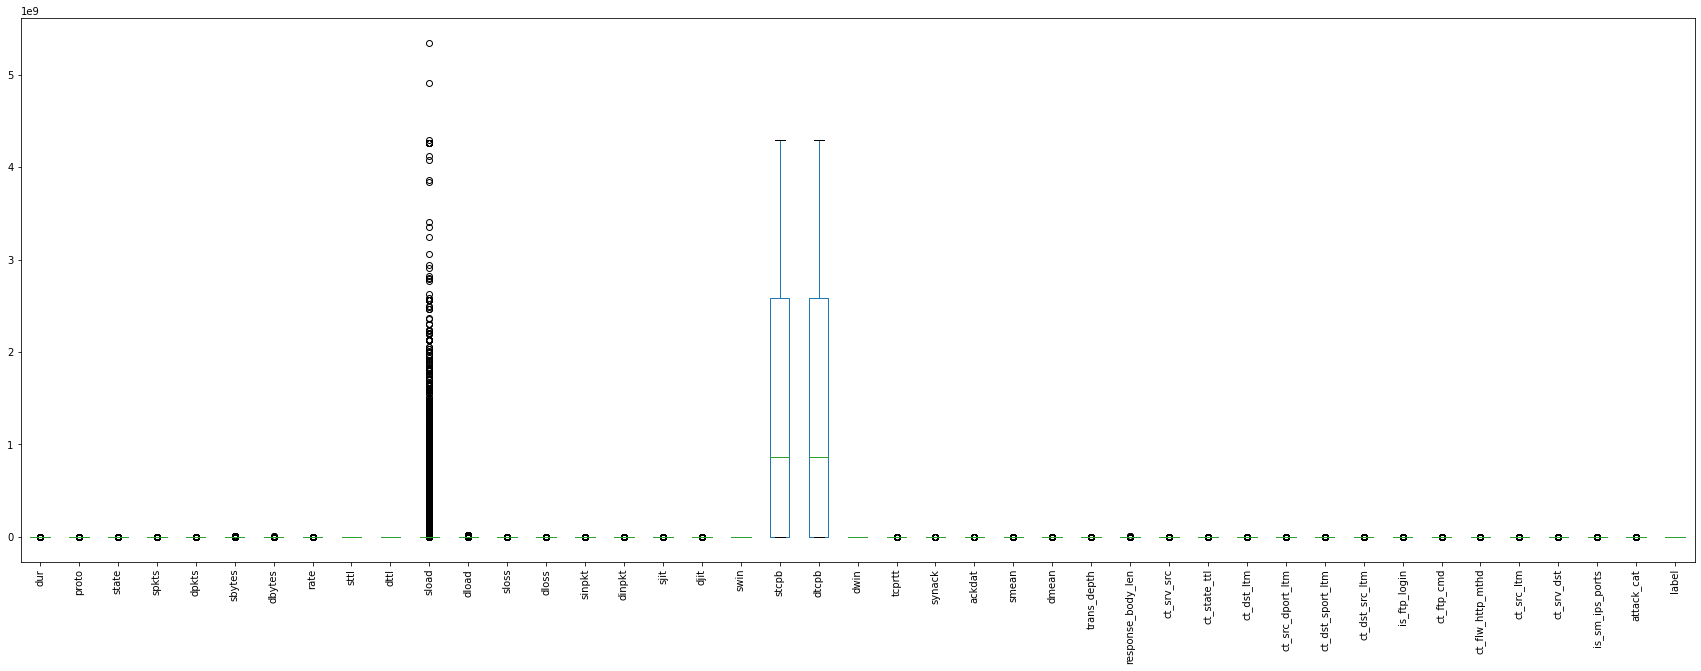

In [18]:
import matplotlib.pyplot as plt
data.plot(kind='box', figsize=(30,10),rot=90)
plt.show()

In [19]:
data=data.drop(['sload'],axis=1)
data=data.drop(['dload'],axis=1)

In [20]:
target = data['label']

In [21]:
# Find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
 
corr_features = correlation(data, 0.8)
print('correlated features: ', set(corr_features) )

correlated features:  {'dwin', 'ct_ftp_cmd', 'dbytes', 'sloss', 'is_sm_ips_ports', 'sbytes', 'label', 'dloss', 'ct_srv_dst'}


In [22]:
data.drop(labels=corr_features, axis=1, inplace=True)

In [23]:
data.drop(["attack_cat"], axis=1, inplace=True)

In [24]:
features = data
X_Train,X_Test,Y_Train,Y_Test=train_test_split(features,target,test_size = 0.2,random_state=42)

In [25]:
X = X_Train
Y = Y_Train
C = Y_Test
T = X_Test
print(T)
print(X)

       dur  proto  state  ...  is_ftp_login  ct_flw_http_mthd  ct_src_ltm
2339     0    113      2  ...             0                 0           8
43641    0    113      2  ...             0                 0           1
10538    0    113      2  ...             0                 0           8
85617    0    120      3  ...             0                 0           6
6662     0    119      0  ...             0                 0           2
...    ...    ...    ...  ...           ...               ...         ...
2824     0    119      0  ...             0                 0           2
51896    0    113      2  ...             0                 0           1
20424    0    119      0  ...             0                 0           3
63675    0    113      2  ...             0                 1           3
80526    1    113      2  ...             0                 0           2

[20377 rows x 31 columns]
        dur  proto  state  ...  is_ftp_login  ct_flw_http_mthd  ct_src_ltm
119548    

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
trainX = scaler.fit_transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
#print(trainX[0:5,:])

In [27]:
scaler = StandardScaler()
# transform data
testT = scaler.fit_transform(T)
# summarize transformed data
np.set_printoptions(precision=3)
#print(testT[0:5,:])

In [28]:
y_train = np.array(Y)
y_test = np.array(C)

## **CNN Algorithm**

In [29]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras.layers.convolutional import MaxPooling1D

In [31]:
lstm_output_size = 128

cnn = Sequential()
cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(31,1)))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation="relu"))
cnn.add(Dropout(0.1))
cnn.add(Dense(1, activation="sigmoid"))
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 31, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 15, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 960)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               123008    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 123,393
Trainable params: 123,393
Non-trainable params: 0
________________________________________________

In [32]:
X_train = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
X_test = np.reshape(testT, (testT.shape[0], testT.shape[1],1))
cnn.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])
cnn.fit(X_train, y_train,epochs=10)

Epoch 1/10
2548/2548 [==============================] - 30s 5ms/step - loss: 0.1599 - accuracy: 0.9399
Epoch 2/10
2548/2548 [==============================] - 13s 5ms/step - loss: 0.0799 - accuracy: 0.9718
Epoch 3/10
2548/2548 [==============================] - 13s 5ms/step - loss: 0.0752 - accuracy: 0.9726
Epoch 4/10
2548/2548 [==============================] - 13s 5ms/step - loss: 0.0720 - accuracy: 0.9730
Epoch 5/10
2548/2548 [==============================] - 12s 5ms/step - loss: 0.0677 - accuracy: 0.9744
Epoch 6/10
2548/2548 [==============================] - 12s 5ms/step - loss: 0.0655 - accuracy: 0.9747
Epoch 7/10
2548/2548 [==============================] - 12s 5ms/step - loss: 0.0649 - accuracy: 0.9759
Epoch 8/10
2548/2548 [==============================] - 12s 5ms/step - loss: 0.0649 - accuracy: 0.9752
Epoch 9/10
2548/2548 [==============================] - 12s 5ms/step - loss: 0.0604 - accuracy: 0.9771
Epoch 10/10
2548/2548 [==============================] - 13s 5ms/step - l

In [33]:
loss, accuracy = cnn.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

637/637 [==============================] - 2s 2ms/step - loss: 0.0617 - accuracy: 0.9750

Loss: 0.06, Accuracy: 97.50%


In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
y_pred = cnn.predict_classes(X_test)
np.savetxt('/content/drive/MyDrive/expected.txt', y_test, fmt='%01d')
np.savetxt('/content/drive/MyDrive/predicted.txt', y_pred, fmt='%01d')
cnn_accuracy = accuracy_score(y_test, y_pred)
cnn_error = (1- cnn_accuracy)*100
cnn_recall = recall_score(y_test, y_pred , average="binary")
cnn_precision = precision_score(y_test, y_pred , average="binary")
cnn_f1 = f1_score(y_test, y_pred, average="binary")

print("confusion matrix")
print("----------------------------------------------")
print("accuracy")
print("%.6f" %cnn_accuracy)
print("racall")
print("%.6f" %cnn_recall)
print("precision")
print("%.6f" %cnn_precision)
print("f1score")
print("%.6f" %cnn_f1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("==============================================")

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


confusion matrix
----------------------------------------------
accuracy
0.974972
racall
0.980157
precision
0.964799
f1score
0.972418
[[10877   328]
 [  182  8990]]


In [36]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Normal','Attacks']))

              precision    recall  f1-score   support

      Normal       0.98      0.97      0.98     11205
     Attacks       0.96      0.98      0.97      9172

    accuracy                           0.97     20377
   macro avg       0.97      0.98      0.97     20377
weighted avg       0.98      0.97      0.97     20377



## **RNN Algorithm**

In [37]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from tensorflow.keras.preprocessing import sequence
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding
from tensorflow.keras.layers import LSTM, SimpleRNN, GRU
from tensorflow.keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [40]:
batch_size = 64

model = Sequential()
model.add(SimpleRNN(8,input_dim=31, return_sequences=True)) 
model.add(Dropout(0.1))
model.add(SimpleRNN(8, return_sequences=False)) 
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [41]:
X_train = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
X_test = np.reshape(testT, (testT.shape[0],1, testT.shape[1]))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=batch_size, epochs=10)

Epoch 1/10
1274/1274 [==============================] - 5s 2ms/step - loss: 0.2533 - accuracy: 0.8977
Epoch 2/10
1274/1274 [==============================] - 3s 2ms/step - loss: 0.1764 - accuracy: 0.9298
Epoch 3/10
1274/1274 [==============================] - 3s 2ms/step - loss: 0.1593 - accuracy: 0.9367
Epoch 4/10
1274/1274 [==============================] - 3s 2ms/step - loss: 0.1473 - accuracy: 0.9413
Epoch 5/10
1274/1274 [==============================] - 3s 2ms/step - loss: 0.1390 - accuracy: 0.9458
Epoch 6/10
1274/1274 [==============================] - 3s 2ms/step - loss: 0.1335 - accuracy: 0.9487
Epoch 7/10
1274/1274 [==============================] - 3s 2ms/step - loss: 0.1296 - accuracy: 0.9510
Epoch 8/10
1274/1274 [==============================] - 3s 2ms/step - loss: 0.1269 - accuracy: 0.9517
Epoch 9/10
1274/1274 [==============================] - 3s 2ms/step - loss: 0.1235 - accuracy: 0.9535
Epoch 10/10
1274/1274 [==============================] - 3s 2ms/step - loss: 0.121

In [42]:
loss, accuracy = model.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

637/637 [==============================] - 1s 2ms/step - loss: 0.1058 - accuracy: 0.9591

Loss: 0.11, Accuracy: 95.91%


In [44]:
y_pred = model.predict_classes(X_test)
np.savetxt('/content/drive/MyDrive/expected.txt', y_test, fmt='%01d')
np.savetxt('/content/drive/MyDrive/predicted.txt', y_pred, fmt='%01d')
rnn_accuracy = accuracy_score(y_test, y_pred)
rnn_error = (1- rnn_accuracy)*100
rnn_recall = recall_score(y_test, y_pred , average="binary")
rnn_precision = precision_score(y_test, y_pred , average="binary")
rnn_f1 = f1_score(y_test, y_pred, average="binary")

print("confusion matrix")
print("----------------------------------------------")
print("accuracy")
print("%.6f" %rnn_accuracy)
print("racall")
print("%.6f" %rnn_recall)
print("precision")
print("%.6f" %rnn_precision)
print("f1score")
print("%.6f" %rnn_f1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("==============================================")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


confusion matrix
----------------------------------------------
accuracy
0.959072
racall
0.975905
precision
0.935905
f1score
0.955487
[[10592   613]
 [  221  8951]]


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Normal','Attacks']))

              precision    recall  f1-score   support

      Normal       0.98      0.95      0.96     11205
     Attacks       0.94      0.98      0.96      9172

    accuracy                           0.96     20377
   macro avg       0.96      0.96      0.96     20377
weighted avg       0.96      0.96      0.96     20377



# **SVM Algorithm**

In [46]:
from sklearn.svm import SVC
model = SVC(kernel='sigmoid',C=0.1,random_state = 1)
model.fit(trainX, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [47]:
predict = model.predict(testT)
np.savetxt('/content/drive/MyDrive/expected.txt', y_test, fmt='%01d')
np.savetxt('/content/drive/MyDrive/predicted.txt', predict, fmt='%01d')
svm_accuracy = accuracy_score(y_test, predict)
svm_error = (1- svm_accuracy)*100
svm_recall = recall_score(y_test, predict , average="binary")
svm_precision = precision_score(y_test, predict , average="binary")
svm_f1 = f1_score(y_test, predict, average="binary")

print("confusion matrix")
print("----------------------------------------------")
print("accuracy")
print("%.6f" %svm_accuracy)
print("racall")
print("%.6f" %svm_recall)
print("precision")
print("%.6f" %svm_precision)
print("f1score")
print("%.6f" %svm_f1)
cm = confusion_matrix(y_test, predict)
print(cm)
print("==============================================")

confusion matrix
----------------------------------------------
accuracy
0.825686
racall
0.812037
precision
0.802932
f1score
0.807459
[[9377 1828]
 [1724 7448]]


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict, target_names=['Normal','Attacks']))

              precision    recall  f1-score   support

      Normal       0.84      0.84      0.84     11205
     Attacks       0.80      0.81      0.81      9172

    accuracy                           0.83     20377
   macro avg       0.82      0.82      0.82     20377
weighted avg       0.83      0.83      0.83     20377



## **Decision Tree Algorithm**

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',random_state=0,splitter="random",max_features=5,max_depth=6)
dtc.fit(trainX, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='random')

In [50]:
predict = dtc.predict(testT)
np.savetxt('/content/drive/MyDrive/expected.txt', y_test, fmt='%01d')
np.savetxt('/content/drive/MyDrive/predicted.txt', predict, fmt='%01d')
dtc_accuracy = accuracy_score(y_test, predict)
dtc_error = (1- dtc_accuracy)*100
dtc_recall = recall_score(y_test, predict , average="binary")
dtc_precision = precision_score(y_test, predict , average="binary")
dtc_f1 = f1_score(y_test, predict, average="binary")

print("confusion matrix")
print("----------------------------------------------")
print("accuracy")
print("%.6f" %dtc_accuracy)
print("racall")
print("%.6f" %dtc_recall)
print("precision")
print("%.6f" %dtc_precision)
print("f1score")
print("%.6f" %dtc_f1)
cm = confusion_matrix(y_test, predict)
print(cm)
print("==============================================")

confusion matrix
----------------------------------------------
accuracy
0.882858
racall
0.992913
precision
0.796833
f1score
0.884132
[[8883 2322]
 [  65 9107]]


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict, target_names=['Normal','Attacks']))

              precision    recall  f1-score   support

      Normal       0.99      0.79      0.88     11205
     Attacks       0.80      0.99      0.88      9172

    accuracy                           0.88     20377
   macro avg       0.89      0.89      0.88     20377
weighted avg       0.90      0.88      0.88     20377



In [52]:
report = pd.DataFrame(index=[1,2,3,4])
report['Algorithm'] = ['CNN', 'RNN','SVM', 'DTC']
report['Accuracy (%)'] = [cnn_accuracy*100, rnn_accuracy*100,svm_accuracy*100,dtc_accuracy*100]
report['Error (%)'] = [cnn_error, rnn_error,svm_error,dtc_error]
report['Precision (%)'] = [cnn_precision*100,rnn_precision*100,svm_precision*100,dtc_precision*100]
report['Recall (%)'] = [cnn_recall*100,rnn_recall*100,svm_recall*100,dtc_recall*100]
report['F1 score (%)'] = [cnn_f1*100,rnn_f1*100,svm_f1*100,dtc_f1*100]
print("============================Binary class Classification of Attacks============================")
report

============================Binary class Classification of Attacks============================


,Algorithm,Accuracy (%),Error (%),Precision (%),Recall (%),F1 score (%)
1,CNN,97.497178,2.502822,96.479931,98.015700,97.241752
2,RNN,95.907150,4.092850,93.590548,97.590493,95.548676
3,SVM,82.568582,17.431418,80.293230,81.203663,80.745880
4,DTC,88.285812,11.714188,79.683262,99.291321,88.413184


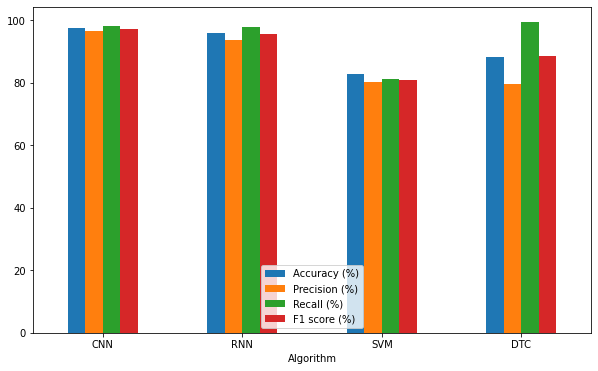

In [53]:
import matplotlib.pyplot as plt
report.plot(x="Algorithm", y=["Accuracy (%)", "Precision (%)", "Recall (%)","F1 score (%)"], kind="bar",figsize=(10,6))
plt.xticks(rotation=360)
plt.show()

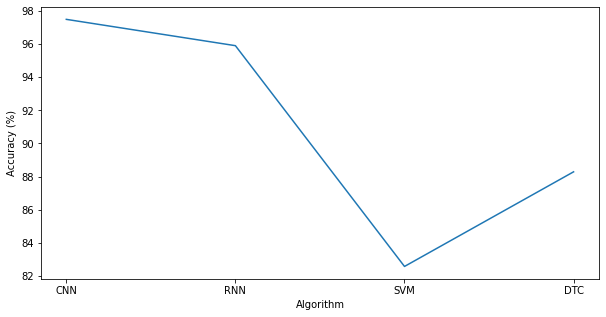

In [54]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x="Algorithm", y="Accuracy (%)", data=report, ax=ax)
plt.show()